In [1]:
%matplotlib inline

from model import pipeline
import model.pandas as mpd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import fbeta_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/Users/tyler/anaconda2/envs/fastai/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
parking_records = pd.read_csv('../data/parkingrecords.csv')

In [5]:
1463364111300
1462252229600

True

In [6]:
parking_records['date'] = pd.to_datetime(parking_records['datetime'] // 1000, unit = 's')

In [7]:
parking_records['hour'] = parking_records['date'].dt.hour
parking_records['month'] = parking_records['date'].dt.month
parking_records['year'] = parking_records['date'].dt.year
parking_records['day'] = parking_records['date'].dt.day

In [8]:
parking_records.groupby('month').count()

,lat,lon,datetime,date,hour,year,day
month,,,,,,,
1,133,133,133,133,133,133,133
2,180,180,180,180,180,180,180
3,1759130,1759130,1759130,1759130,1759130,1759130,1759130
4,236,236,236,236,236,236,236
5,237,237,237,237,237,237,237
6,164,164,164,164,164,164,164
7,191,191,191,191,191,191,191
8,226,226,226,226,226,226,226
9,400,400,400,400,400,400,400


In [86]:
parking_records[(parking_records['month'] == 3) & (parking_records['year'] == 2015)].groupby('day').count()

,lat,lon,datetime,date,hour,month,year
day,,,,,,,
10,89775,89775,89775,89775,89775,89775,89775
11,90850,90850,90850,90850,90850,90850,90850
12,91634,91634,91634,91634,91634,91634,91634
13,95058,95058,95058,95058,95058,95058,95058
14,89875,89875,89875,89875,89875,89875,89875
15,4093,4093,4093,4093,4093,4093,4093
16,90672,90672,90672,90672,90672,90672,90672
17,92120,92120,92120,92120,92120,92120,92120
18,91239,91239,91239,91239,91239,91239,91239


In [9]:
v = parking_records[parking_records['month'] == 3].groupby('hour')['lat'].count()

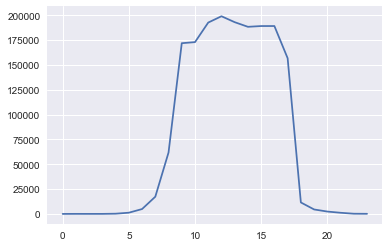

In [10]:
plt.plot(v.index, v.data)

In [4]:
parking_records.columns

Index(['lat', 'lon', 'datetime'], dtype='object')

In [ ]:
parking_records.groupby(['lat', 'lon'])